In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064


In [4]:
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD ($)')

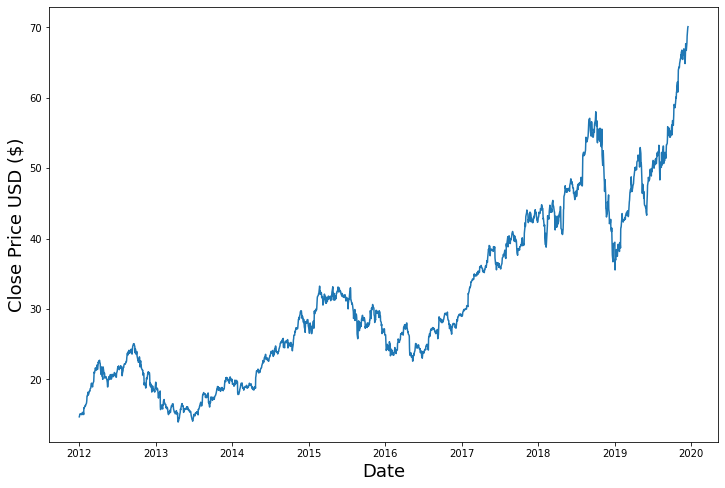

In [5]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [6]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()


In [7]:
dataset = df['Close']
# dataset = data.values

In [8]:
def preprocessing(df):
    training_data_len = int(np.round(len(df) * .8))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [9]:
training_data_len, dataset, scaler, scaled_data = preprocessing(dataset)

In [10]:
#training_data_len = int(np.round(len(dataset) * .8))

In [11]:
training_data_len

1602

In [12]:
#dataset = pd.DataFrame(dataset)

In [13]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))
# scaled_data = scaler.fit_transform(dataset)
# scaled_data

In [14]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60
        if i <=61:
            print(X_train)
            print(y_train)
            print()

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        
    return X_train, X_test, y_train, y_test    

In [15]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

[array([[0.01316509],
       [0.01457064],
       [0.01748985],
       [0.02026915],
       [0.01984303],
       [0.02080338],
       [0.02036454],
       [0.01962679],
       [0.01862193],
       [0.02173194],
       [0.02453668],
       [0.02367172],
       [0.01893356],
       [0.02345548],
       [0.01900352],
       [0.03569838],
       [0.03440731],
       [0.0360927 ],
       [0.03973694],
       [0.04194384],
       [0.0417594 ],
       [0.0410789 ],
       [0.04397903],
       [0.04670744],
       [0.04979839],
       [0.05479095],
       [0.0652785 ],
       [0.06543749],
       [0.07127594],
       [0.07563885],
       [0.06814046],
       [0.07102789],
       [0.07097066],
       [0.07906688],
       [0.07791571],
       [0.08004628],
       [0.08387497],
       [0.08600558],
       [0.09214292],
       [0.09661397],
       [0.09790501],
       [0.09835659],
       [0.09071194],
       [0.08886753],
       [0.08914103],
       [0.09632775],
       [0.09835024],
       [0.10

In [16]:
"""
61st value we want model to predict
"""

# #create training data set
# train_data = scaled_data[0:training_data_len,:]
# test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
# #split data into X_train and y_train data sets
# X_train = []
# y_train = []
# #create dataset X_test and y_test data sets
# X_test = []
# y_test = dataset.iloc[training_data_len:, :]


# for i in range(60, len(train_data)):
#     X_train.append(train_data[i-60:i])
#     y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60
#     if i <=61:
#         print(X_train)
#         print(y_train)
#         print()
        
# for i in range(60, len(test_data)):
#     X_test.append(test_data[i-60:i,0])        

'\n61st value we want model to predict\n'

In [17]:
#convert X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train

array([[[0.01316509],
        [0.01457064],
        [0.01748985],
        ...,
        [0.13766105],
        [0.14243103],
        [0.14442805]],

       [[0.01457064],
        [0.01748985],
        [0.02026915],
        ...,
        [0.14243103],
        [0.14442805],
        [0.13949272]],

       [[0.01748985],
        [0.02026915],
        [0.01984303],
        ...,
        [0.14442805],
        [0.13949272],
        [0.13293563]],

       ...,

       [[0.49675003],
        [0.52177011],
        [0.51927696],
        ...,
        [0.57991274],
        [0.5857448 ],
        [0.59767603]],

       [[0.52177011],
        [0.51927696],
        [0.51669488],
        ...,
        [0.5857448 ],
        [0.59767603],
        [0.5912207 ]],

       [[0.51927696],
        [0.51669488],
        [0.51322235],
        ...,
        [0.59767603],
        [0.5912207 ],
        [0.58926183]]])

In [19]:
X_train.shape

(1542, 60, 1)

In [20]:
#reshape X_train dataset
#before it's 2D
#X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]))

In [21]:

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
__________

In [23]:
#train the model
model.fit(X_train,y_train, epochs=50, batch_size=32 ) #,callbacks=[early_stop]

Epoch 1/50
1542/1542 [==============================] - 15s 10ms/step - loss: 0.0065
Epoch 2/50
1542/1542 [==============================] - 11s 7ms/step - loss: 0.0012
Epoch 3/50
1542/1542 [==============================] - 12s 8ms/step - loss: 0.0011
Epoch 4/50
1542/1542 [==============================] - 13s 8ms/step - loss: 0.0010
Epoch 5/50
1542/1542 [==============================] - 15s 10ms/step - loss: 8.2927e-04
Epoch 6/50
1542/1542 [==============================] - 11s 7ms/step - loss: 8.1461e-04
Epoch 7/50
1542/1542 [==============================] - 11s 7ms/step - loss: 6.7593e-04
Epoch 8/50
1542/1542 [==============================] - 11s 7ms/step - loss: 6.7599e-04
Epoch 9/50
1542/1542 [==============================] - 15s 10ms/step - loss: 6.3924e-04
Epoch 10/50
1542/1542 [==============================] - 21s 14ms/step - loss: 6.6114e-04
Epoch 11/50
1542/1542 [==============================] - 13s 8ms/step - loss: 5.9558e-04
Epoch 12/50
1542/1542 [===================

In [24]:
#create the testing dataset
#create new array containing scaled values from index 1543 to 2003
#create training data set

# test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
# #create dataset X_test and y_test data sets
# X_test = []
# y_test = dataset[training_data_len:, :]

# for i in range(60, len(test_data)):
#     X_test.append(test_data[i-60:i,0])
#     y_test.append(test_data[i,0]) #will contain 61st value which will be at position 60
    

In [25]:
#convert data to a numpy array
X_test = np.array(X_test)

In [26]:
X_test.shape

(401, 60)

In [27]:
#number of rows, number of timeseteps, number of features
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [28]:
X_test.shape

(401, 60, 1)

In [29]:
#get models predicted price values for X_test dataset
#want predcitions to contain same values as y_test dataset once we inverse_transform
#getting predcitiosn off of X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [30]:
predictions

array([[47.83931 ],
       [47.708794],
       [47.574505],
       [47.440083],
       [47.38912 ],
       [47.39492 ],
       [47.48352 ],
       [47.60553 ],
       [47.740654],
       [47.83308 ],
       [47.863373],
       [47.826675],
       [47.89837 ],
       [48.11537 ],
       [48.44646 ],
       [48.809055],
       [49.092888],
       [49.193104],
       [49.136497],
       [49.04918 ],
       [48.91504 ],
       [48.779816],
       [48.594673],
       [48.40252 ],
       [48.122334],
       [47.861908],
       [47.63343 ],
       [47.44329 ],
       [47.196514],
       [47.036884],
       [46.96674 ],
       [47.01476 ],
       [47.109833],
       [47.28792 ],
       [47.353153],
       [47.370163],
       [47.471123],
       [47.730286],
       [48.03579 ],
       [48.192963],
       [48.33626 ],
       [48.480354],
       [48.584656],
       [48.663754],
       [48.673782],
       [48.697582],
       [48.721077],
       [48.74634 ],
       [48.82752 ],
       [49.012352],


In [31]:
#evaluate model w/RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

Close    0.847279
dtype: float64

In [32]:
predictions = pd.DataFrame(predictions, columns=['Predictions'])

In [33]:
train = dataset[:training_data_len]
valid = dataset[training_data_len:] #data from index training_data_len to 

In [34]:
len(predictions), len(valid)

(401, 401)

In [35]:
valid.reset_index(inplace=True)

In [36]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    401 non-null    datetime64[ns]
 1   Close   401 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


In [37]:
valid.head()

,Date,Close
0,2018-05-16,47.044998
1,2018-05-17,46.747501
2,2018-05-18,46.577499
3,2018-05-21,46.907501
4,2018-05-22,46.790001


In [38]:
predictions.head()

,Predictions
0,47.839310
1,47.708794
2,47.574505
3,47.440083
4,47.389118


In [39]:
valid['Prediction'] = predictions['Predictions']

In [40]:
valid1 = valid.set_index('Date')

In [41]:
valid1.head()

,Close,Prediction
Date,,
2018-05-16,47.044998,47.839310
2018-05-17,46.747501,47.708794
2018-05-18,46.577499,47.574505
2018-05-21,46.907501,47.440083
2018-05-22,46.790001,47.389118


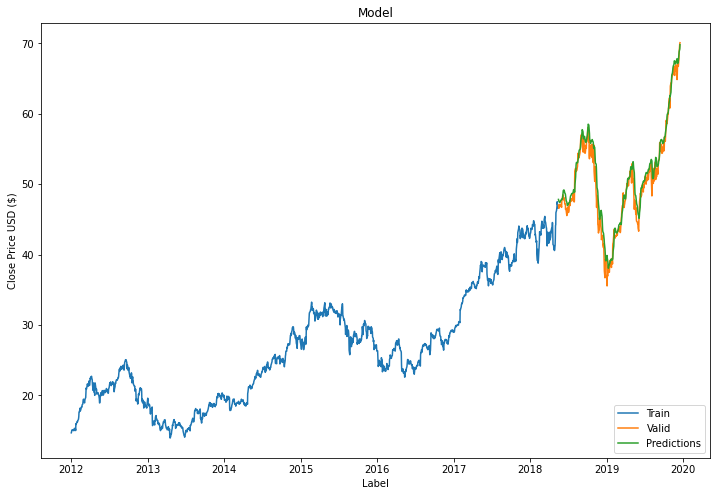

In [42]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be
"""

# train = dataset[:training_data_len]
# valid = dataset[training_data_len:] #data from index training_data_len to 
# valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Label')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
#plt.plot(valid[['Close','Predictions']])
plt.plot(valid1['Close'])
plt.plot(valid1['Prediction'])
# #valid[['Close','Predictions']].plot()
plt.legend(['Train','Valid','Predictions'],loc='lower right')

In [43]:
dataset.tail()

,Close
Date,
2019-12-11,67.692497
2019-12-12,67.864998
2019-12-13,68.787498
2019-12-16,69.964996
2019-12-17,70.102501


In [44]:
"""
predict closing price fo apple stock for 12/18/2019

get the quote
"""
#apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
##create a new dataframe
#new_df = apple_quote.filter(['Close'])
new_df = dataset.copy()
#get last 60days closing values and convert datframe to an array
last_60_days = new_df[-60:].values #converts to array
#scale data
last_60_days_scaled = scaler.transform(last_60_days)
#realreate empty list
x_test = []
#append last 60 days to x_test
x_test.append(last_60_days_scaled)
#conert x_test to a numpy array
x_test = np.array(x_test)
# #reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#get the predcited scaled price
pred_price = model.predict(x_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price) 
#print predcied price
#what model thinks predcited price will be for 12/18/2019
#the actual prcie was $69.94
print(pred_price)                    

[[70.44162]]
